# Cardiovascular Heart Disease Prediction with XAI

## Introduction
This notebook outlines the process of predicting cardiovascular heart disease using various machine learning models. The analysis involves data preprocessing, exploratory data analysis (EDA), feature selection, model training, and interpretation using explainable AI techniques.

## Library Imports

In [ ]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)

In [5]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd

def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred))
    print("Recall : ", recall_score(y_true, y_pred))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    print("ROC-AUC Score : ", roc_auc_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [2]:
# Load the dataset
data = pd.read_csv("data/cardio_train.csv", sep=';')

## Dataset Overview
The dataset comprises multiple features including age, gender, height, weight, and various medical measurements such as blood pressure and cholesterol levels. Our objective is to leverage this data to understand the factors contributing to CHD and develop a reliable prediction model.

In [3]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df=data

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Initial Data Exploration
After loading the data, we proceed to examine the types of data contained within our dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
print(df.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [10]:
#drop id
df = df.drop('id', axis=1)

## Data Cleaning

Data cleaning was the next step where I identified and removed outliers from features such as 'height', 'weight', and blood pressure readings ('ap_hi' and 'ap_lo'). This was done by excluding values that fell outside the 2.5th and 97.5th percentiles, which helps mitigate the impact of extreme variances on the models' performance.

In [11]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

60142

In [12]:
df[df['ap_lo']> df['ap_hi']].shape[0]

0

In [13]:
#after removing outliers
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

Moving to feature engineering, I sought to enrich the dataset by calculating Body Mass Index (BMI) and Mean Arterial Pressure (MAP), which are critical indicators of cardiovascular health. BMI was derived from the 'height' and 'weight' attributes, while MAP was computed using systolic and diastolic blood pressure values. These engineered features often provide more insight than raw data as they capture more clinically relevant information.

In [14]:
df['age'] = (df['age'] / 365).round().astype('int')

print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [15]:
#Categorizing features

# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


Attribute Combination

It is important to combine some attributes into more meaningful ones. For example, using Body Mass Index (BMI) instead of the features weight and height individually, is more useful. Therefore, we have added Body Mass Index (BMI) and Mean Arterial Pressure (MAP) to the data.

In [16]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()

bmiMin = int(df['bmi'].min())
bmiMax = int(df['bmi'].max())

print(bmiMin, bmiMax)

df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()


df["bmi"].value_counts(normalize=True)

16 46


1    0.461325
2    0.330202
3    0.133068
0    0.038193
4    0.033554
5    0.003658
Name: bmi, dtype: float64

In [17]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['map'].min())
mapMax = int(df['map'].max())

print(mapMin, mapMax)

df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

73 121


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [18]:
null_rows = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


## Categorization and Encoding

To handle non-linear relationships, We categorized the 'age' attribute into bins and created an 'age_group' feature, which segments age into more manageable categories, making the model's interpretation more straightforward. Following this, we used `LabelEncoder` to transform categorical variables into a machine-readable numeric format. While encoding, we preserved the dataset's integrity by ensuring no data was lost.

In [19]:
df_og=df

df=df.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,2
1,1,3,1,0,0,1,1,4,3,4
2,1,3,1,0,0,0,1,4,1,2
3,2,1,1,0,0,1,1,3,2,5
4,1,1,1,0,0,0,0,3,1,0


In [20]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,0.347311,0.350953,0.220229,0.085631,0.051877,0.803648,0.488228,4.042233,1.673440,2.359449
std,0.476120,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,1.377070,0.898707,1.186906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,3.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000


## Clustering and Feature Selection

We implemented clustering to explore inherent groupings within the data. Since most features were categorical, I chose K-modes over K-means due to its appropriateness for categorical data. The elbow method helped determine the optimal number of clusters by looking for a point where increasing the number of clusters leads to diminishing returns in terms of the clustering cost.

In [21]:
cost = []
num_clusters = range(1,5) # 1 to 4
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Clusters graph

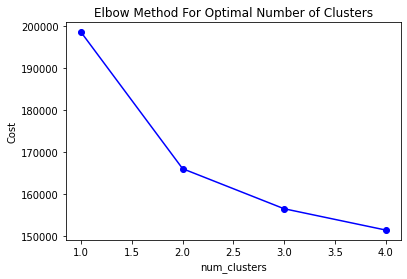

In [22]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [23]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([1, 0, 1, ..., 1, 0, 1], dtype=uint16)

In [24]:
# #Adding clusters column in DF

df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,1,1,0,0,0,0,1,0,3,1,2
1,0,0,2,0,0,0,1,1,4,3,4
2,1,0,2,0,0,0,0,1,4,1,2
3,0,1,0,0,0,0,1,1,3,2,5
4,1,0,0,0,0,0,0,0,3,1,0


## Correlation Analysis

Post-clustering, I examined the correlation of features with the target variable ('cardio') and removed those with negligible correlation ('gender' and 'alco'), thereby simplifying the model and potentially enhancing its predictive power.

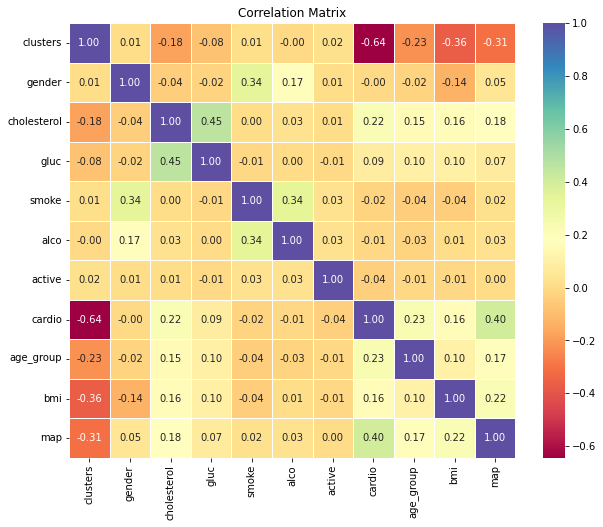

In [26]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

'gender' has a correlation of 0 to our target 'cardio', and 'smoke' has a correlation of '0.01'. We will remove those features to increase performance.

Distribution of cardio in clusters



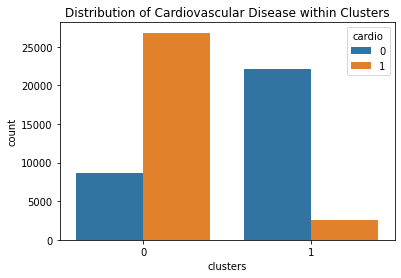

In [27]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

Split Data
Training set: 80%

Test set: 20%

According to the correlation table, gender has 0 correlation with our target. Moreover, ‘alco’ has 0.01 correlation. Therefore, we dropped those two features and saw an increase in the performance of our models.

In [28]:
x = df.drop(['cardio','gender','alco'], axis=1)
y = df['cardio']
x.head()

,clusters,cholesterol,gluc,smoke,active,age_group,bmi,map
0,1,0,0,0,1,3,1,2
1,0,2,0,0,1,4,3,4
2,1,2,0,0,0,4,1,2
3,0,0,0,0,1,3,2,5
4,1,0,0,0,0,3,1,0


In [29]:
x = x.rename(columns={'clusters':'Clusters', 'cholesterol':'Cholesterol', 'gluc':'Glucose', 'smoke':'Smoking',
                  'active':'Physical activity', 'age_group':'Age', 'bmi':'Body Mass Index', 'map':'Mean Arterial Pressure',})

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [31]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48113 entries, 20655 to 38356
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Clusters                48113 non-null  uint16
 1   Cholesterol             48113 non-null  int64 
 2   Glucose                 48113 non-null  int64 
 3   Smoking                 48113 non-null  int64 
 4   Physical activity       48113 non-null  int64 
 5   Age                     48113 non-null  int64 
 6   Body Mass Index         48113 non-null  int64 
 7   Mean Arterial Pressure  48113 non-null  int64 
dtypes: int64(7), uint16(1)
memory usage: 3.0 MB


## Model Training and Evaluation

## MLP

In [32]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]="python"

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam



# Define Ir model (same as before)
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a specified learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')


2024-03-19 23:11:28.776541: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 23:11:28.995696: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-19 23:11:30.391126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda-11.2/lib64:/usr/local:/usr/lib
2024-03-19 23:11:30.391267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfe

Epoch 1/50
1203/1203 [==============================] - 8s 5ms/step - loss: 0.4475 - accuracy: 0.7976 - val_loss: 0.3857 - val_accuracy: 0.8262
Epoch 2/50
1203/1203 [==============================] - 5s 4ms/step - loss: 0.3898 - accuracy: 0.8279 - val_loss: 0.3491 - val_accuracy: 0.8445
Epoch 3/50
1203/1203 [==============================] - 6s 5ms/step - loss: 0.3599 - accuracy: 0.8388 - val_loss: 0.3160 - val_accuracy: 0.8533
Epoch 4/50
1203/1203 [==============================] - 5s 4ms/step - loss: 0.3353 - accuracy: 0.8453 - val_loss: 0.2888 - val_accuracy: 0.8594
Epoch 5/50
1203/1203 [==============================] - 6s 5ms/step - loss: 0.3210 - accuracy: 0.8503 - val_loss: 0.2934 - val_accuracy: 0.8642
Epoch 6/50
1203/1203 [==============================] - 5s 4ms/step - loss: 0.3112 - accuracy: 0.8554 - val_loss: 0.2795 - val_accuracy: 0.8657
Epoch 7/50
1203/1203 [==============================] - 6s 5ms/step - loss: 0.3087 - accuracy: 0.8554 - val_loss: 0.2782 - val_accuracy:

## Logistic Regression

In [35]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

logreg = LogisticRegression(random_state=1)

random_search = RandomizedSearchCV(logreg, param_grid_logreg, cv=5, n_iter=10)

random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_lr = random_search.best_params_
best_model_lr = random_search.best_estimator_

# Fit the model on training data
best_model_lr.fit(x_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_lr)
print("Best Model:")
print(best_model_lr)

# Make predictions on both training and test data
y_pred_train_lr = best_model_lr.predict(x_train)
y_pred_test_lr = best_model_lr.predict(x_test)

Best Parameters:
{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}
Best Model:
LogisticRegression(C=0.001, random_state=1, solver='saga')


In [36]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_lr)

Training Data Evaluation:
Precision :  0.7918295543393276
Recall :  0.8599388638872378
Accuracy :  0.8207553052189637
F1 Score :  0.8244799934871982
ROC-AUC Score :  0.8215570373021432

Confusion Matrix:
 [[19234  5325]
 [ 3299 20255]]




In [37]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82     24559
           1       0.79      0.86      0.82     23554

    accuracy                           0.82     48113
   macro avg       0.82      0.82      0.82     48113
weighted avg       0.82      0.82      0.82     48113



In [38]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_lr)

Test Data Evaluation:
Precision :  0.7791170945522855
Recall :  0.856773971423653
Accuracy :  0.8135339595976391
F1 Score :  0.8161023202426826
ROC-AUC Score :  0.8149625484127911

Confusion Matrix:
 [[4809 1411]
 [ 832 4977]]




In [39]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      6220
           1       0.78      0.86      0.82      5809

    accuracy                           0.81     12029
   macro avg       0.82      0.81      0.81     12029
weighted avg       0.82      0.81      0.81     12029



In [40]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
lr_scores = cross_validate(best_model_lr, x_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in lr_scores.items() if 'test_' in metric}
print("Average scores of testing data for Logistic Regression:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Logistic Regression:
Precision: 0.7851849056177865
Recall: 0.7853304691634756
Accuracy: 0.7925008338474673
F1: 0.785219759051575
Roc_auc: 0.8624884107807576


In [41]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
lr_scores = cross_validate(best_model_lr, x_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in lr_scores.items() if 'test_' in metric}
print("Average scores of traning data for Logistic Regression:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Logistic Regression:
Precision: 0.7912659087468361
Recall: 0.8574767010939297
Accuracy: 0.819487672144871
F1: 0.8230313126553185
Roc_auc: 0.8890739630362072


## CatBoost Classifier 

In [42]:
param_grid_catboost = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

catboost = CatBoostClassifier(random_state=1, verbose=False)

random_search = RandomizedSearchCV(catboost, param_grid_catboost, cv=5, n_iter=10)

random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_cat = random_search.best_params_
best_model_cat = random_search.best_estimator_

# Fit the model on training data
best_model_cat.fit(x_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_cat)
print("Best Model:")
print(best_model_cat)

# Make predictions on both training and test data
y_pred_train_cat = best_model_cat.predict(x_train)
y_pred_test_cat = best_model_cat.predict(x_test)

Best Parameters:
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
Best Model:


In [43]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_cat)

Training Data Evaluation:
Precision :  0.8820581500842442
Recall :  0.8668166765729812
Accuracy :  0.878057905347827
F1 Score :  0.8743709984796899
ROC-AUC Score :  0.8778278993435369

Confusion Matrix:
 [[21829  2730]
 [ 3137 20417]]




In [44]:
print(classification_report(y_train, y_pred_train_cat))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     24559
           1       0.88      0.87      0.87     23554

    accuracy                           0.88     48113
   macro avg       0.88      0.88      0.88     48113
weighted avg       0.88      0.88      0.88     48113



In [45]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_cat)

Test Data Evaluation:
Precision :  0.878545327997216
Recall :  0.8691685315889137
Accuracy :  0.8787929171169673
F1 Score :  0.8738317757009346
ROC-AUC Score :  0.8784749410356144

Confusion Matrix:
 [[5522  698]
 [ 760 5049]]




In [46]:
print(classification_report(y_test, y_pred_test_cat))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6220
           1       0.88      0.87      0.87      5809

    accuracy                           0.88     12029
   macro avg       0.88      0.88      0.88     12029
weighted avg       0.88      0.88      0.88     12029



In [47]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
cat_scores = cross_validate(best_model_cat, x_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in cat_scores.items() if 'test_' in metric}
print("Average scores of testing data for CB Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for CB Classifier:
Precision: 0.88508852130662
Recall: 0.8583212881055413
Accuracy: 0.8777111275864392
F1: 0.8714540216585496
Roc_auc: 0.9582491366250047


In [48]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
cat_scores = cross_validate(best_model_cat, x_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in cat_scores.items() if 'test_' in metric}
print("Average scores of traning data for CB Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for CB Classifier:
Precision: 0.8800440674760333
Recall: 0.8668593223340955
Accuracy: 0.8769772685491415
F1: 0.8733993431355277
Roc_auc: 0.9586802183359413


## Decision Tree

In [49]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

decision_tree = DecisionTreeClassifier()

random_search = RandomizedSearchCV(decision_tree, param_grid_dt, cv=5, n_iter=10)

random_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_dt = random_search.best_params_
best_model_dt = random_search.best_estimator_

# Fit the model on training data
best_model_dt.fit(x_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_dt)
print("Best Model:")
print(best_model_dt)

# Make predictions on both training and test data
y_pred_train_dt = best_model_dt.predict(x_train)
y_pred_test_dt = best_model_dt.predict(x_test)

Best Parameters:
{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}
Best Model:
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)


In [50]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_dt)

Training Data Evaluation:
Precision :  0.8900876304548857
Recall :  0.8581557272650081
Accuracy :  0.878681437449338
F1 Score :  0.8738300585781295
ROC-AUC Score :  0.8782614623132322

Confusion Matrix:
 [[22063  2496]
 [ 3341 20213]]




In [51]:
print(classification_report(y_train, y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     24559
           1       0.89      0.86      0.87     23554

    accuracy                           0.88     48113
   macro avg       0.88      0.88      0.88     48113
weighted avg       0.88      0.88      0.88     48113



In [52]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_dt)

Test Data Evaluation:
Precision :  0.8869026548672566
Recall :  0.8626269581683594
Accuracy :  0.8805386981461468
F1 Score :  0.8745963871192949
ROC-AUC Score :  0.8799469195986492

Confusion Matrix:
 [[5581  639]
 [ 798 5011]]




In [53]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6220
           1       0.89      0.86      0.87      5809

    accuracy                           0.88     12029
   macro avg       0.88      0.88      0.88     12029
weighted avg       0.88      0.88      0.88     12029



In [54]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
dt_scores = cross_validate(best_model_dt, x_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in dt_scores.items() if 'test_' in metric}
print("Average scores of testing data for Decision Tree:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Decision Tree:
Precision: 0.8848917611150174
Recall: 0.846786481474069
Accuracy: 0.872806549115776
F1: 0.8653940469732406
Roc_auc: 0.9527838059927195


In [55]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
dt_scores = cross_validate(best_model_dt, x_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in dt_scores.items() if 'test_' in metric}
print("Average scores of traning data for Decision Tree:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Decision Tree:
Precision: 0.8798468386307416
Recall: 0.8638029168756685
Accuracy: 0.8755431524879562
F1: 0.8716973697871475
Roc_auc: 0.9572293521859221


## RandomForest Classifier 

In [56]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=1)

# Perform Randomized Search CV
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, n_iter=10)

# Fit Randomized Search CV on training data
random_search_rf.fit(x_train, y_train)

# Get the best parameters and the best model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

# Fit the best model on training data
best_model_rf.fit(x_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_rf)
print("Best Model:")
print(best_model_rf)

# Make predictions on both training and test data
y_pred_train_rf = best_model_rf.predict(x_train)
y_pred_test_rf = best_model_rf.predict(x_test)

Best Parameters:
{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}
Best Model:
RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=1)


In [57]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_rf)

Training Data Evaluation:
Precision :  0.8837969132883366
Recall :  0.8728029209476097
Accuracy :  0.8815496851162887
F1 Score :  0.8782655131902168
ROC-AUC Score :  0.8813707181797376

Confusion Matrix:
 [[21856  2703]
 [ 2996 20558]]




In [58]:
print(classification_report(y_train, y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     24559
           1       0.88      0.87      0.88     23554

    accuracy                           0.88     48113
   macro avg       0.88      0.88      0.88     48113
weighted avg       0.88      0.88      0.88     48113



In [61]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_rf)

Test Data Evaluation:
Precision :  0.8730186078566505
Recall :  0.8722671716302289
Accuracy :  0.8770471360877878
F1 Score :  0.8726427279772668
ROC-AUC Score :  0.8768892128247608

Confusion Matrix:
 [[5483  737]
 [ 742 5067]]




In [62]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6220
           1       0.87      0.87      0.87      5809

    accuracy                           0.88     12029
   macro avg       0.88      0.88      0.88     12029
weighted avg       0.88      0.88      0.88     12029



In [63]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
rf_scores = cross_validate(best_model_rf, x_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in rf_scores.items() if 'test_' in metric}
print("Average scores of testing data for RF Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for RF Classifier:
Precision: 0.8739244449158414
Recall: 0.8657239515463108
Accuracy: 0.8748015961482295
F1: 0.8697620937364086
Roc_auc: 0.9532009165303503


In [64]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
rf_scores = cross_validate(best_model_rf, x_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in rf_scores.items() if 'test_' in metric}
print("Average scores of traning data for RFClassifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for RFClassifier:
Precision: 0.8769562490513497
Recall: 0.8645242714683663
Accuracy: 0.8742753133822732
F1: 0.870674825527993
Roc_auc: 0.9564886486390544


## Soft Voting

In [65]:
# Base models
clf1 = best_model_rf
clf2 = best_model_cat
clf3 = best_model_dt

# Ensemble model
ensemble_clf = VotingClassifier(estimators=[
    ('rf', clf1),
    ('cbc', clf2),
    ('dt', clf3)
], voting='soft')

# Evaluate the best model from random search
best_model = random_search.best_estimator_
random_search_score = best_model.score(x_test, y_test)
print(f'Best Ensemble model accuracy (RandomizedSearchCV): {random_search_score:.4f}')


Best Ensemble model accuracy (RandomizedSearchCV): 0.8805


In [66]:
y_pred_train_vc = best_model.predict(x_train)
y_pred_test_vc = best_model.predict(x_test)

print("Training Data Evaluation:")
perform(y_train, y_pred_train_vc)

Training Data Evaluation:
Precision :  0.8900876304548857
Recall :  0.8581557272650081
Accuracy :  0.878681437449338
F1 Score :  0.8738300585781295
ROC-AUC Score :  0.8782614623132322

Confusion Matrix:
 [[22063  2496]
 [ 3341 20213]]




In [67]:
print(classification_report(y_train, y_pred_train_vc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     24559
           1       0.89      0.86      0.87     23554

    accuracy                           0.88     48113
   macro avg       0.88      0.88      0.88     48113
weighted avg       0.88      0.88      0.88     48113



In [68]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_vc)

Test Data Evaluation:
Precision :  0.8869026548672566
Recall :  0.8626269581683594
Accuracy :  0.8805386981461468
F1 Score :  0.8745963871192949
ROC-AUC Score :  0.8799469195986492

Confusion Matrix:
 [[5581  639]
 [ 798 5011]]




In [69]:
print(classification_report(y_test, y_pred_test_vc))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6220
           1       0.89      0.86      0.87      5809

    accuracy                           0.88     12029
   macro avg       0.88      0.88      0.88     12029
weighted avg       0.88      0.88      0.88     12029



In [70]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
vc_scores = cross_validate(best_model, x_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in vc_scores.items() if 'test_' in metric}
print("Average scores of testing data for Voting Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Voting Classifier:
Precision: 0.8856905066677443
Recall: 0.846786481474069
Accuracy: 0.8732221767134485
F1: 0.8657778716281817
Roc_auc: 0.9528020692155696


In [71]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
vc_scores = cross_validate(best_model, x_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in vc_scores.items() if 'test_' in metric}
print("Average scores of traning data for Voting Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Voting Classifier:
Precision: 0.8798468386307416
Recall: 0.8638029168756685
Accuracy: 0.8755431524879562
F1: 0.8716973697871475
Roc_auc: 0.9571733463170602


# Stacking Classifier

In [72]:
# Define the parameter grid for grid search
# Ensemble model
estimators = [
    ('lr', best_model_lr),
    ('cat', best_model_cat),
    ('dt', best_model_dt)
]

# Create a meta-classifier (final estimator)
meta_classifier = DecisionTreeClassifier(random_state=1)
# meta_classifier = RandomForestClassifier()

# Create the stacking classifier
best_model_stack = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)

# Fit the stacking classifier to the data
best_model_stack.fit(x_train, y_train)

# Print the best model
print("Best Model for Stacking Classifier:")
print(best_model_stack)

Best Model for Stacking Classifier:
StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=0.001, random_state=1,
                                                   solver='saga')),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7f1855bfa750>),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       min_samples_leaf=4,
                                                       min_samples_split=10))],
                   final_estimator=DecisionTreeClassifier(random_state=1))


In [73]:
# Fit the model on training data
best_model_stack.fit(x_train, y_train)

# Make predictions on both training and test data
y_pred_train_stack = best_model_stack.predict(x_train)
y_pred_test_stack = best_model_stack.predict(x_test)

In [74]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_stack)

Training Data Evaluation:
Precision :  0.8441777854791197
Recall :  0.8273329370807506
Accuracy :  0.8407083324673166
F1 Score :  0.8356704832968824
ROC-AUC Score :  0.8404346594276264

Confusion Matrix:
 [[20962  3597]
 [ 4067 19487]]




In [75]:
print(classification_report(y_train, y_pred_train_stack))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     24559
           1       0.84      0.83      0.84     23554

    accuracy                           0.84     48113
   macro avg       0.84      0.84      0.84     48113
weighted avg       0.84      0.84      0.84     48113



In [76]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_stack)

Test Data Evaluation:
Precision :  0.8366672464776483
Recall :  0.8280254777070064
Accuracy :  0.838889350735722
F1 Score :  0.8323239314760339
ROC-AUC Score :  0.8385304237409629

Confusion Matrix:
 [[5281  939]
 [ 999 4810]]




In [77]:
print(classification_report(y_test, y_pred_test_stack))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6220
           1       0.84      0.83      0.83      5809

    accuracy                           0.84     12029
   macro avg       0.84      0.84      0.84     12029
weighted avg       0.84      0.84      0.84     12029



In [78]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
stack_scores = cross_validate(best_model_stack, x_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in stack_scores.items() if 'test_' in metric}
print("Average scores of testing data for Stacking Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Stacking Classifier:
Precision: 0.8530161780945816
Recall: 0.819757435055838
Accuracy: 0.8442920764616526
F1: 0.8357077430959701
Roc_auc: 0.8765763417111012


In [79]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
stack_scores = cross_validate(best_model_stack, x_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in stack_scores.items() if 'test_' in metric}
print("Average scores of training data for Stacking Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of training data for Stacking Classifier:
Precision: 0.8615287298903797
Recall: 0.8164652903873619
Accuracy: 0.8456342395571408
F1: 0.838180180751132
Roc_auc: 0.8939423716146043


In [80]:
feature_columns = x.columns.tolist()
#categorical features
categorical_features = [i for i, col in enumerate(x.columns) if x[col].dtype in ['category', 'object']]
class_names = ["Normal", "Heart Disease"]

## Local Interpretable Model-agnostic Explanations (LIME)

### Understanding Model Predictions with LIME
While our models provide us with predictions on cardiovascular diseases, understanding why these predictions are made is crucial. LIME helps by approximating our model locally around the prediction. It provides explanations which features contribute most to the model's decision for a specific instance.

In this section, we use LIME to interpret the predictions of our best performing model. By selecting individual instances from the test set, we generate explanations that highlight the influence of each feature on the model's prediction. This approach not only adds transparency but also allows us to validate whether the model's reasoning aligns with clinical expectations.


In [81]:
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(x_train.values, 
                                 feature_names=feature_columns, 
                                 class_names=class_names,
                                 categorical_features=categorical_features, 
                                 mode='classification')


In [82]:
# instance for explanation
instance_index = 5
instance = x_test.iloc[instance_index]

# Generate and display the explanation
explanation_knn = explainer_lime.explain_instance(instance.values, best_model.predict_proba, num_features=len(feature_columns))
explanation_knn.show_in_notebook()

## SHapley Additive exPlanations (SHAP)

### Interpreting Model Predictions with SHAP
SHAP values offer a unified measure of feature importance and impact on a model's output. The SHAP framework applies game theory, attributing the prediction to the contribution of each feature. It provides a deeper insight into how each feature affects the model's decision, both positively and negatively, for individual predictions.

In this analysis, we apply SHAP to further dissect our model's predictive behavior. We generate SHAP summary plots to visualize the overall impact of features across all predictions.

  0%|          | 0/100 [00:00<?, ?it/s]

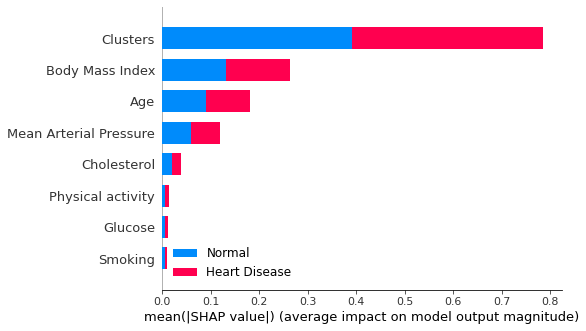

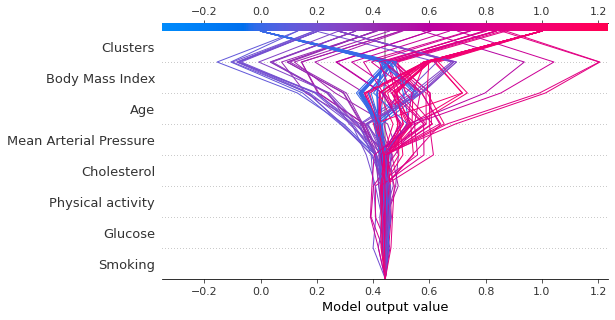

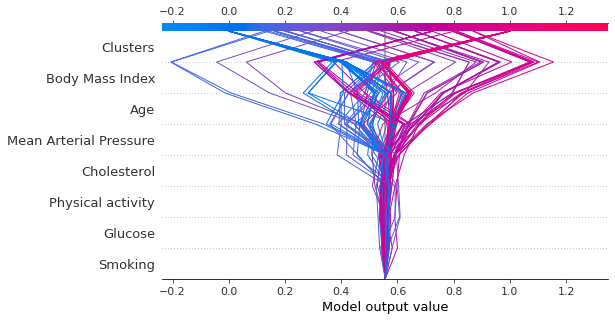

In [83]:
import shap

# Assuming 'best_model' is your trained VotingClassifier from RandomizedSearchCV
model_to_explain = best_model

# Define the prediction function for the ensemble model to work with probabilities for SHAP explanations
def ensemble_predict_proba(data):
    return model_to_explain.predict_proba(data)

# Initialize the KernelExplainer with the prediction function and a subset of the training data
explainer = shap.KernelExplainer(model=ensemble_predict_proba, data=x_train[feature_columns].iloc[:100])

# Compute SHAP values for a subset of the test data to make the computation more manageable
shap_values = explainer.shap_values(X=x_test[feature_columns].iloc[:100], nsamples=100)

# Summary plot for all classes using the feature names and class names for better interpretation
shap.summary_plot(shap_values, x_test[feature_columns].iloc[:100], feature_names=feature_columns, class_names=class_names)

# # Dependence plot for a specific feature (e.g., 'age_group') to see its effect and interaction with another feature (e.g., 'bmi')
# # Ensure the features exist in your dataset
# for i, feature_name in enumerate(feature_columns):
#     for j, interaction_feature in enumerate(feature_columns):
#         if feature_name != interaction_feature:
#             shap.dependence_plot(feature_name, 
#                                  shap_values[1], 
#                                  x_test[feature_columns].iloc[:100], 
#                                  interaction_index=interaction_feature, 
#                                  feature_names=feature_columns) 

# # Force plot for an individual prediction showing the first class ('Normal')
# shap.force_plot(base_value=explainer.expected_value[0], shap_values=shap_values[0][0,:], features=x_test[feature_columns].iloc[0,:], feature_names=feature_columns, matplotlib=True)

# # Force plot for another individual prediction showing the second class ('Heart Disease')
# shap.force_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1][6,:], features=x_test[feature_columns].iloc[6,:], feature_names=feature_columns, matplotlib=True)

# Decision plot for Heart Disease class
shap.decision_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1], feature_names=feature_columns)

# Decision plot for Normal class
shap.decision_plot(base_value=explainer.expected_value[0], shap_values=shap_values[0], feature_names=feature_columns)


## Conclusion
In conclusion, our analysis demonstrates the potential of machine learning techniques and XAI in predicting cardiovascular heart disease. By carefully preprocessing the data, engineering relevant features, and evaluating multiple models and applying XAI techniques, we identified the most effective approach for CHD prediction. Future work may involve exploring more complex models, additional feature engineering, and leveraging larger datasets to further improve prediction accuracy.